# PaddleOCR

优点：中文识别较为准确，可以输出置信度

In [1]:
from paddleocr import PaddleOCR, draw_ocr

In [2]:
det_model_dir=r'C:\Users\HP\.paddleocr\whl\det\ch\ch_PP-OCRv4_det_infer'#文本位置检测模型
rec_model_dir=r'C:\Users\HP\.paddleocr\whl\rec\ch\ch_PP-OCRv4_rec_infer'#文本识别模型
cls_model_dir=r'C:\Users\HP\.paddleocr\whl\cls\ch_ppocr_mobile_v2.0_cls_infer'#文本方向分类模型

In [2]:
 # 初始化PaddleOCR，能够识别180度旋转的文字
ocr = PaddleOCR(use_angle_cls=True, lang='ch')  # need to run only once to download and load model into memory

[2025/01/13 19:34:52] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\lin kexiu/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\lin kexiu/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_d

In [ ]:
# 初始化PaddleOCR，能够识别180度旋转的文字
# ocr = PaddleOCR(use_angle_cls=True, lang='ch', 
#                 det_model_dir=det_model_dir, rec_model_dir=rec_model_dir, cls_model_dir=cls_model_dir)  # need to run only once to download and load model into memory

In [3]:
import cv2
from matplotlib import pyplot as plt

## 彩色测试图像

In [16]:
 # 读取图片
image_path = './dataset/panels/color/18/1.jpg'
img = cv2.imread(image_path)

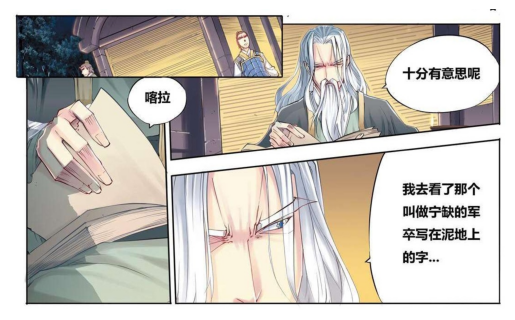

In [17]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
img_gaussian = cv2.GaussianBlur(gray, (5, 5), 0)#先模糊，去除噪声

In [8]:
# cv2.imshow('Gaussian Image', img_gaussian)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
result = ocr.ocr(gray, cls=True)

[2025/01/13 19:39:23] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.7612473964691162
[2025/01/13 19:39:23] ppocr DEBUG: cls num  : 6, elapsed : 0.06881189346313477
[2025/01/13 19:39:23] ppocr DEBUG: rec_res num  : 6, elapsed : 0.21593427658081055


In [21]:
result

[[[[[886.0, 132.0], [1058.0, 132.0], [1058.0, 160.0], [886.0, 160.0]],
   ('十分有意思呢', 0.9892373085021973)],
  [[[301.0, 181.0], [363.0, 181.0], [363.0, 217.0], [301.0, 217.0]],
   ('喀拉', 0.9946974515914917)],
  [[[884.0, 390.0], [1057.0, 390.0], [1057.0, 422.0], [884.0, 422.0]],
   ('我去看了那个', 0.9983687996864319)],
  [[[884.0, 441.0], [1059.0, 441.0], [1059.0, 472.0], [884.0, 472.0]],
   ('叫做宁缺的军', 0.9980239272117615)],
  [[[882.0, 491.0], [1058.0, 489.0], [1058.0, 522.0], [883.0, 524.0]],
   ('卒写在泥地上', 0.9461775422096252)],
  [[[882.0, 541.0], [970.0, 541.0], [970.0, 576.0], [882.0, 576.0]],
   ('的字...', 0.7733597159385681)]]]

In [22]:
len(result)

1

In [23]:
result[0][0][1]

('十分有意思呢', 0.9892373085021973)

In [ ]:
for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

In [11]:
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[[[534.0, 111.0], [708.0, 111.0], [708.0, 143.0], [534.0, 143.0]], ('我去看了那个', 0.9983044266700745)]
[[[535.0, 161.0], [710.0, 163.0], [710.0, 195.0], [534.0, 193.0]], ('叫做宁缺的军', 0.9990070462226868)]
[[[535.0, 215.0], [709.0, 215.0], [709.0, 244.0], [535.0, 244.0]], ('卒写在泥地上', 0.9909646511077881)]
[[[531.0, 260.0], [621.0, 263.0], [620.0, 300.0], [530.0, 297.0]], ('的字...', 0.7416592836380005)]


`result`结果是一个list，每一个item包括了文本框的坐标，文字以及文字识别的置信度。

In [19]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(image_path).convert("RGB")
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

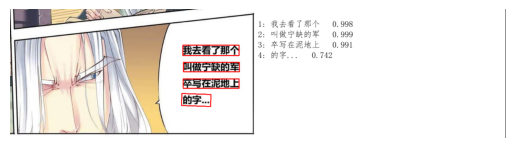

In [20]:
# 使用matplotlib显示图像
plt.imshow(im_show)
plt.axis('off')  # 不显示坐标轴
plt.show()

对于较为规范的对话框识别效果较好，但其可能是像素横向遍历识别，导致并非同一对话框内的文字识别在了一起，因此需要对对话框进行分割。

## 竖向文本测试图像

In [5]:
# 读取图片
image_path = './dataset/panels/gray/5.jpg'
img = cv2.imread(image_path)

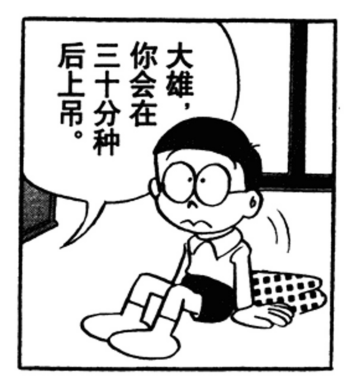

In [6]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [7]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/23 17:03:25] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.9819538593292236
[2024/12/23 17:03:25] ppocr DEBUG: cls num  : 8, elapsed : 0.19148802757263184
[2024/12/23 17:03:25] ppocr DEBUG: rec_res num  : 8, elapsed : 0.3988025188446045
Text: 你, Confidence: 0.999053418636322
Text: 大雄, Confidence: 0.8754199743270874
Text: 后, Confidence: 0.9915478825569153
Text: 三, Confidence: 0.9740575551986694
Text: 会在, Confidence: 0.9995589256286621
Text: 上吊, Confidence: 0.9909346103668213
Text: 十分种, Confidence: 0.9998116493225098


In [8]:
# 逆时针旋转90度
rotated_cw = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('Rotated Clockwise', rotated_cw)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# 保存旋转后的图像
cv2.imwrite('rotated_cw.jpg', rotated_cw)

True

In [9]:
# 读取图片
image_path = 'rotated_cw.jpg'
img = cv2.imread(image_path)

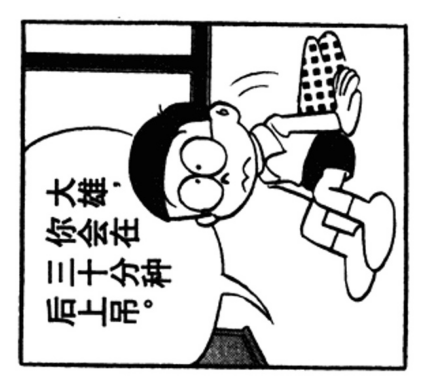

In [10]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [11]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/23 17:04:04] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.4974241256713867
[2024/12/23 17:04:04] ppocr DEBUG: cls num  : 4, elapsed : 0.06795525550842285
[2024/12/23 17:04:04] ppocr DEBUG: rec_res num  : 4, elapsed : 0.13434886932373047
Text: 大雄’, Confidence: 0.9397726058959961
Text: 你会在, Confidence: 0.9997254014015198
Text: 三十分种, Confidence: 0.9998093843460083
Text: 后上吊, Confidence: 0.9990193247795105
